#### 순환 신경망을 사용한 인코더-디코더 네트워크
- 기존 RNN 기반 모델의 한계 : 번역할 문장이 길어질수록 번역의 품질을 유지하기 어려움 
- 시퀀스-투-시퀀스 작업 : 텍스트를 입력받아 텍스트를 출력하는 작업 ex) 기계 번역과 문서 요약

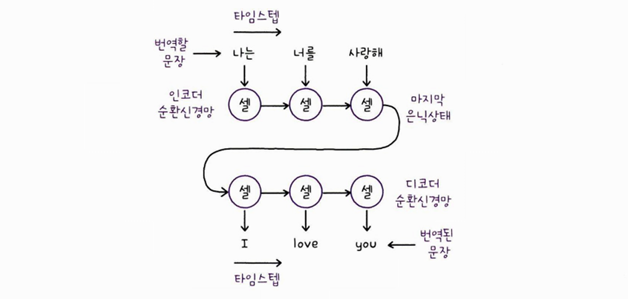

-> 디코더가 인코더의 마지막 은닉 상태만 참고하여 번역을 수행하므로 번역할 문장이 길어질수록 초기에 입력된 내용을 기억하기 어려워짐. 또한 인코더와 디코더는 텍스트를 한 토큰씩 처리하므로 속도가 느림

#### 어텐션 메커니즘
- 순환 신경망 기반 인코더-디코더 모델의 성능을 크게 향상시킨 기술
- 모든 타임스텝에서 인코더가 출력한 은닉 상태를 참조 후 중요한 정보에만 가중치($\alpha$)를 다르게 적용하여 '주의를 기울이는' 방식
- 장점: 긴 텍스트 처리 시 정보 손실을 줄이고 더 정확한 출력 생성
- 단점: 모든 은닉 상태를 저장해야 하므로 연산량이 증가하고 입력 길이에 제한이 생길 수 있음

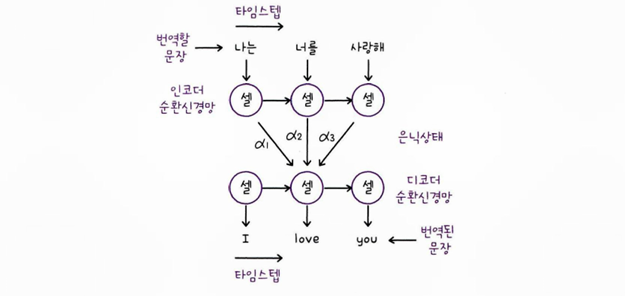

#### 트랜스포머
- 어텐션 메커니즘의 효과를 극대화한 새로운 신경망 구조
- 2017년 구글 연구팀이 “Attention Is All You Need”라는 제목의 논문에서 소개 
- 기존의 인코더-디코더 구조를 유지하면서도 순환 신경망을 완전히 제거. 따라서 입력 텍스트를 한 토큰씩 처리할 필요 없이 한 번에 모두 처리 가능
- 트랜스포머는 순환 신경망을 사용하지 않으므로, 더 이상 은닉 상태라는 개념을 사용하지 않음. 대신, 은닉 벡터 또는 단어 벡터, 임베딩 벡터 라는 표현을 사용

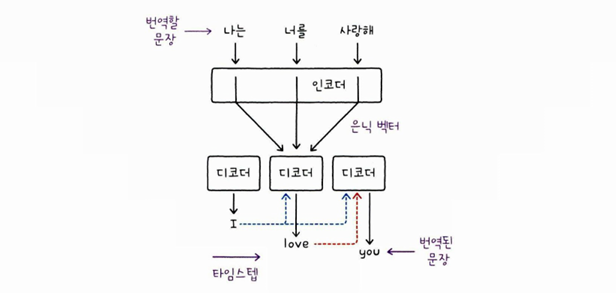

##### 셀프 어텐션 메커니즘
- 기존 어텐션 메커니즘은 인코더의 은닉 상태와 디코더의 은닉 상태를 비교해 디코더가 특정 타임스텝에서 어떤 입력 토큰에 집중해야 하는지를 학습하였으나 트랜스포머에서는 이와 다르게 인코더에 입력되는 토큰만으로 어텐션 가중치를 학습하도록 함
- 각 토큰의 벡터 표현이 주어진 문제를 효과적으로 해결할 수 있도록 학습 됨

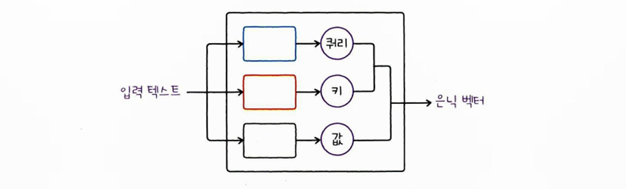

멀티 헤드 어텐션
- 어텐션 헤드 : 셀프 어텐션 연산을 수행하는 하나의 단위
- 트랜스포머는 어텐션 메커니즘을 계산하는 헤드를 여러 개 병렬로 구성하고 마지막에 밀집층을 두어 원래 임베딩 차원으로 복원하는 구조

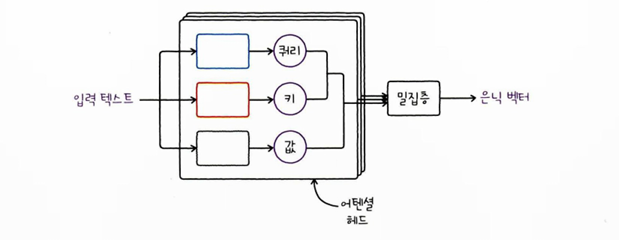

##### 정규화

배치 정규화 
-  딥러닝에서는 여러 개의 층을 거치면서 특성의 스케일이 변할수 있기 때문에, 단순한 입력 정규화만으로는 충분하지 않은 문제 해결을 위해 고안
-  주로 합성곱 신경망에 널리 활용되며 층과 층 사이에 놓이고 이전 층의 출력을 배치 단위로 평균과 분산을 계산하여 평균이 0, 분산이 1 이 되도록 조정한 후, 다음 층으로 전달
- 배치 정규화를 적용하면 훈련 속도가 빨라지고, 학습 과정이 안정화되므로 모델의 성능이 향상될 수 있음

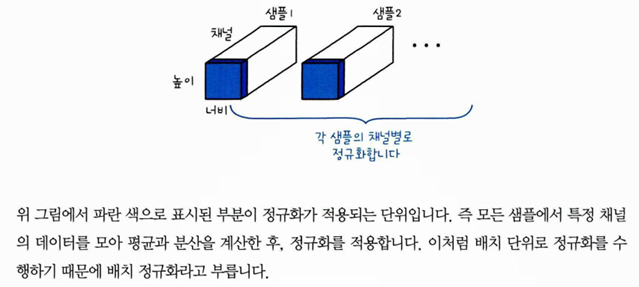

층 정규화
- 텍스트 데이터는 샘플마다 길이가 다르기 때문에 배치 정규화 적용 어려움 
- 각 샘플의 토큰마다 개별적으로 정규화를 수행하는 방식

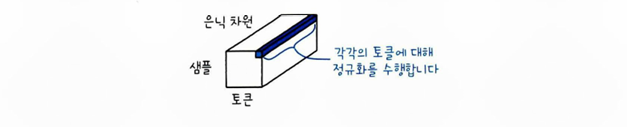

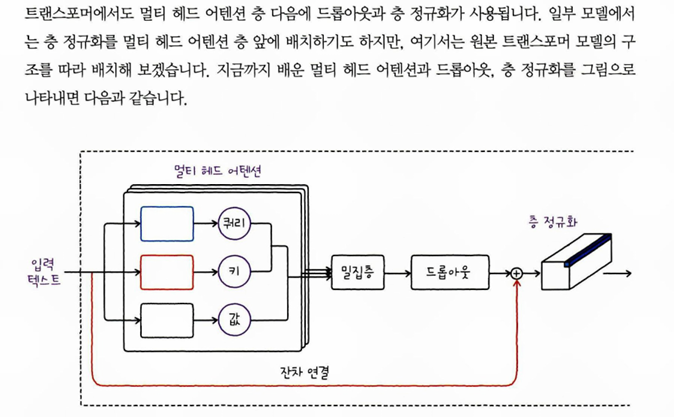

##### 피드포워드 네트워크와 인코더 블록
피드포워드 네트워크 : 트랜스포머의 인코더에서 멀티 헤드 어텐션과 층 정규화 다음에 나오는 밀집층

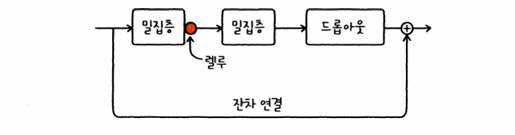

트랜스포머 인코더 블록

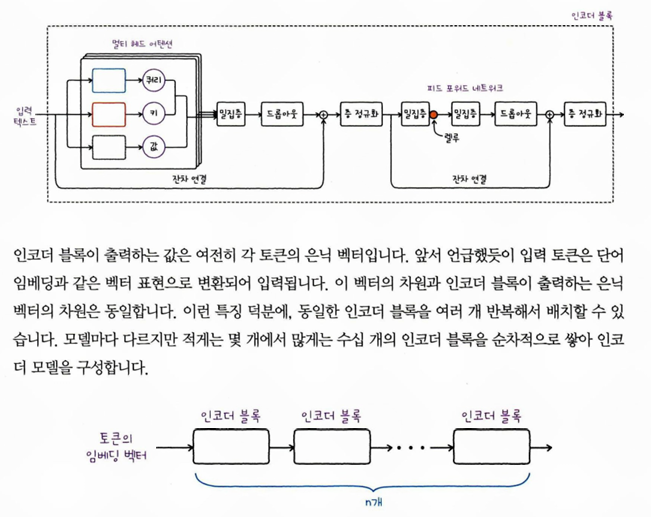

##### 토큰 임베딩과 위치 인코딩
토큰 임베딩 
- 모델이 입력된 문자를 이해할 수 있도록 토큰을 숫자로 변환
- 트랜스포머는 기존 모델과 다르게 모든 토큰을 동시에 처리하는 방식을 사용하기 때문에 토큰의 위치 고려 x

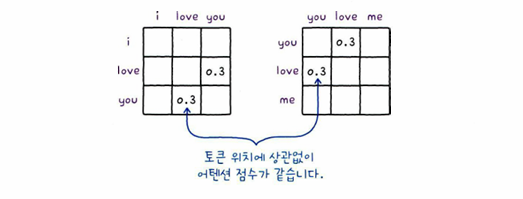

BUT, 단어는 그 위치에 따라 의미가 달라질 수 있음 ex) “I love you”와 “You love me”

따라서 트랜스포머가 문장의 의미를 정확히 이해하려면 위치 정보가 추가적으로 제공되어야 함

위치 임베딩 : 사인 함수와 코사인 함수를 사용해 토큰의 위치에 따라 변하는 벡터를 생성하고, 이를 단어 임베딩에 더하는 방식

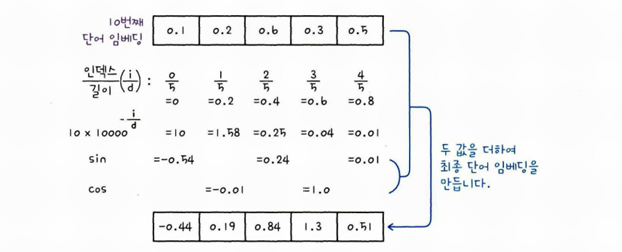



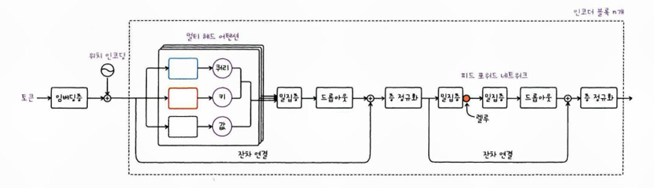

##### 디코더 블록
- 크로스 어텐션 : 디코더에서 받은 벡터를 쿼리로 사용하고, 인코더의 출력을 키와 값으로 사용
- 마스크드 멀티 헤드 어텐션 층 : 디코더가 한 타임스텝에서 어텐션 점수를 계산할 때 현재 토큰까지만 참고하고, 이후의 토큰은 볼 수 없도록 디코더의 첫 번째 멀티 헤드 어텐션 층에 마스킹 처리를 함

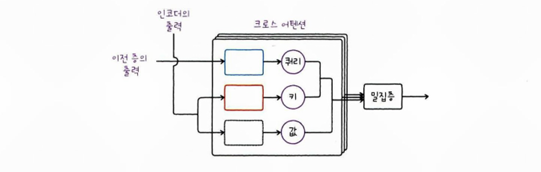

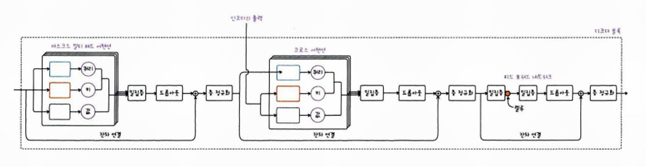

##### 트랜스포머 전체 모델 (인코더 + 디코더)
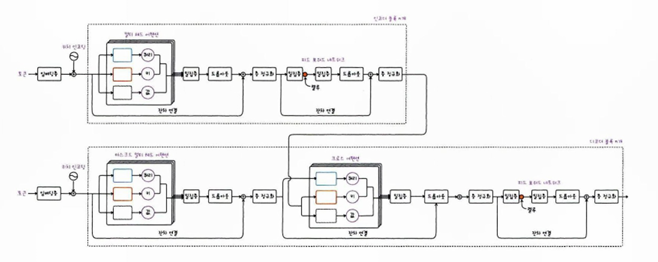

트랜스포머 모델은 대규모 텍스트 데이터셋을 학습하며, 매우 많은 모델 파라미터를 가지고 있음 -> 대규모 언어 모델(LLM)